In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# DataFrame의 출력을 소수점 이하 3자리로 제한
# pd.set_option('precision', 3)
import seaborn as sns
#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats


# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

#피처 생성
X = iris["data"][:, 3:] # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int) # Iris virginica이면 1 아니면 0

C:\Users\user\AppData\Local\Temp\ipykernel_5684\2910868282.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # Iris virginica이면 1 아니면 0


In [3]:
X = iris["data"][:,(2,3)]
y = iris['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
from sklearn.linear_model import LogisticRegression
#분류기 생성 및 훈련
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", 
                                 C=10,random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [9]:
#샘플 데이터 생성
#linspace는 범위 안에 일정한 간격을 갖는 숫자 배열 생성
#linspace(0, 1,5): [0 0.25 0.5 0.75 1.0]
#reshape는 shape 변경 - -1을 설정하면 나머지 전체

#meshgrid는 격자 좌표 생성
#x0은 500행 500열짜리 격자
# x1 = np.linspace(1, 5, 5)
# y1 = np.linspace(6, 10, 5)

# x2, y2 = np.meshgrid(x1, y1)
# print(x2)


x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1),)

#예측에 사용할 샘플 데이터
X_new = np.c_[x0.ravel(), x1.ravel()]

In [8]:
#샘플 데이터를가지고 예측
y_predict = softmax_reg.predict(X_new)
print(y_predict)
#각 샘플의 확률을 조회
y_proba = softmax_reg.predict_proba(X_new)
print(y_predict)

[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]


## SVM(Support Vector Machine)

### 선형 SVM을 이용한 이진 분류

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비 (피처는 2개만 사용)
#이진 분류를 수행하기 위해서
y = (iris["target"] == 2).astype(np.float64) # Iris virginica
#타겟을 수정

#스케일링과 훈련을 실시할 모델을 Pipeline으로 구성
#머신러닝이나 데이터 처리 등을 할 때 Pipeline을 구성하는 것도 매우 중요
#Pipeline을 구성하지 않고 순차적으로 하나씩 해도 되지만 이런 경우 코드의 가독성이 떨어짐
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),])
#훈련
svm_clf.fit(X, y)

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [12]:
#예측 - 1이 나오면 2번 클래스가 맞다는 것이고 0이 나오면 2번 클래스가 아님
print(svm_clf.predict([[5.5, 1.7]]))

[1.]


## 비선형 SVM

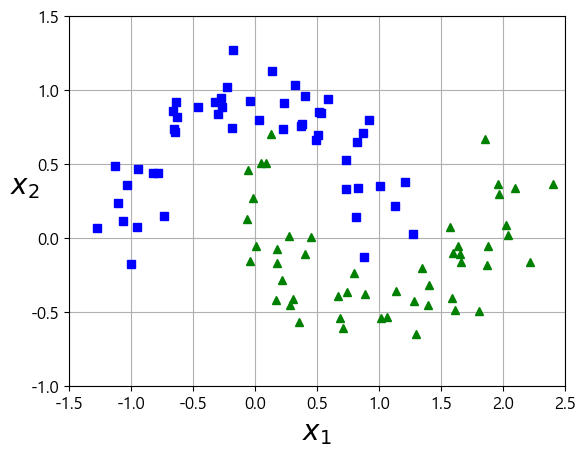

In [13]:
#비선형을 설명하기 위한 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
#비선형 SVM을 이용해서 위의 데이터를 훈련
from sklearn.preprocessing import PolynomialFeatures

#depree 값으 높이면 차수가 높아져서 곡선이 복잡해짐
#훈련 데이터에 대해서는 잘 구분하게 됨
#너무 높게 설정하면 훈련 데이터는 잘 구분하지만
#새로운 데이터는 잘 구분 못할 수 있음
#이러한 상황을 overfitting(과적합)이라고 함
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))])

polynomial_svm_clf.fit(X, y)

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

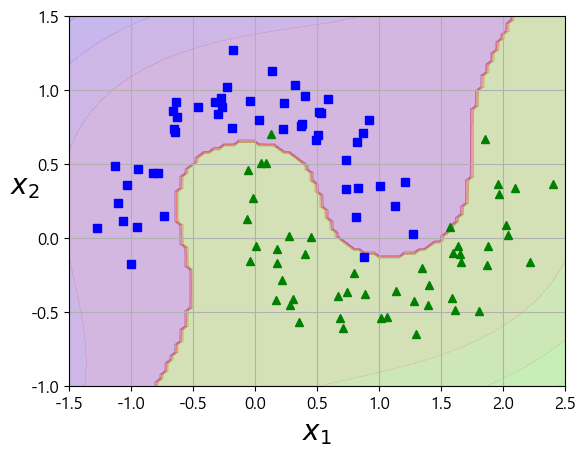

In [22]:
#결정 경계와 데이터의 분포를 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 가우시안 RBF 커널을 이용한 비선형 SVM

In [24]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)
poly100_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [27]:
rbf_kernel_svm_clf.fit(X, y)

plot_predictions(rbf_kernal_svm_clf[-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.show()

NameError: name 'rbf_kernel_svm_clf' is not defined

# Decision Tree

## 분류 모델 생성 및 훈련과 시각화

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [40]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

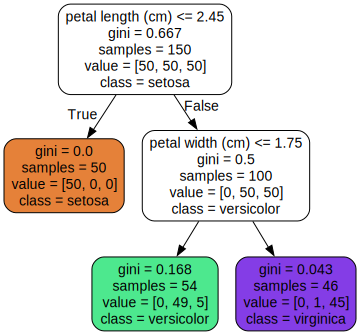

In [42]:
#시각화 결과를 화면에 출력
import os
os.environ['PATH'] += os.pathsep + "C:/Program Files/Graphviz/bin"

with open ("iris_tree.dot") as f:
    dot_graph = f.read()
    
src = graphviz.Source(dot_graph)
src

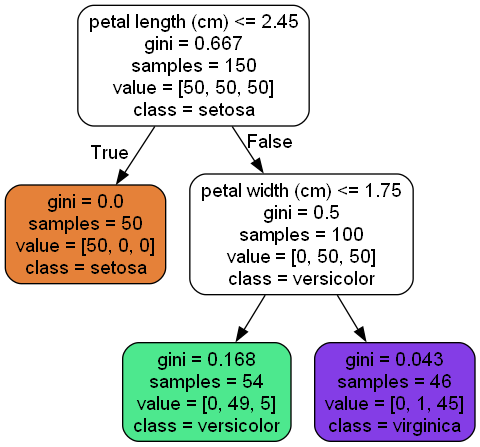

In [43]:
#시각화 결과를 이미지로 저장

import pygraphviz as pga
from IPython.display import Image
graph = pga.AGraph('./iris_tree.dot')
graph.draw("iris_tree.png", prog='dot')
Image("iris_tree.png")

In [44]:
#예측
y_pred = tree_clf.predict([[5, 1.5]])
#확률 예측
y_proda = tree_clf.predict_proba([[5, 1.5]])
print(y_pred)
print(y_proba)

[1]
[[1.000e+00 3.761e-06 6.800e-20]
 [1.000e+00 4.059e-06 7.857e-20]
 [1.000e+00 4.380e-06 9.079e-20]
 ...
 [7.738e-23 1.037e-11 1.000e+00]
 [6.697e-23 9.684e-12 1.000e+00]
 [5.796e-23 9.044e-12 1.000e+00]]


In [46]:
print(tree_clf.feature_importances_)

[0.562 0.438]


# 타이타닉 데이터를 이용한 생존 여부 분류 - 결정 트리 모델 활용

In [49]:
import pandas as pd
import seaborn as sns

In [51]:
df = sns.load_dataset('titanic')

In [53]:
#결측치 처리

#deck 열은 결측치가 너무 많아서 deck 열을 제거
#embaek_town은 중복되서 제거
rdf = df.drop(['deck', 'embark_town'], axis=1) 
#age 열을 결측치가 아주 많지 않기 때문에 결측치 데이터 제거
rdf = rdf.dropna(subset=['age'], how='any', axis=0) 

#embarked 열은 결측치가 2개라서 최빈값으로 대체
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB
